<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/20_1970%EB%85%84%EB%8C%80_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%80%EC%97%AD%EC%9D%98_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1970년대 보스턴 지역의 주택 가격 예측 -> 회귀

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운
(x_train,y_train),(x_test,y_test) = load_data(path='boston_housing.npz',
                                              test_split=0.2,
                                              seed=777)

데이터 형태 확인하기

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터셋 만들기

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

print(x_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [4]:
# 데이터 전처리 -> 표준화(Standardization)

mean = np.mean(x_train,axis=0)
std = np.std(x_train, axis=0)

# (데이터(훈련, 테스트 데이터 모두) -평균) / 표준편차
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(x_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [5]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,
                                              test_size=0.33,
                                              random_state = 777)

In [6]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) #하나의 값을 출력 -> 주택가격


모델 설정하기

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

모델 학습하기

In [9]:
history = model.fit(x_train,y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 25ms/step - loss: 532.7386 - mae: 21.4734 - mse: 532.7386 - val_loss: 580.5195 - val_mae: 21.9122 - val_mse: 580.5195
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 505.7476 - mae: 20.8427 - mse: 505.7476 - val_loss: 550.5311 - val_mae: 21.2293 - val_mse: 550.5311
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 475.1661 - mae: 20.1100 - mse: 475.1661 - val_loss: 514.1254 - val_mae: 20.3931 - val_mse: 514.1254
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 437.5984 - mae: 19.1964 - mse: 437.5984 - val_loss: 468.9924 - val_mae: 19.3147 - val_mse: 468.9924
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 391.1441 - mae: 18.0018 - mse: 391.1441 - val_loss: 414.4985 - val_mae: 17.9282 - val_mse: 414.4985
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 336.0502 - mae: 16.5051 - mse: 336.0502 - val_loss: 351.7909 - val_mae: 1

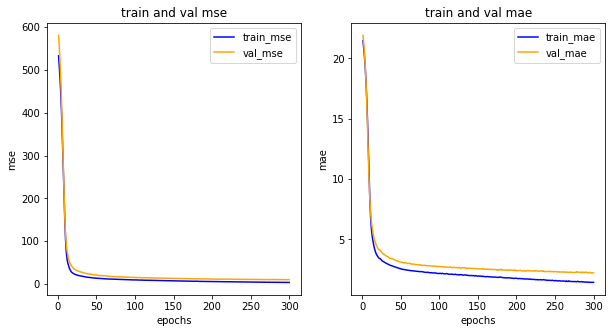

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


모델 평가하기

In [12]:
model.evaluate(x_test, y_test) # mae 2.0 -> 실제 집값과 2000 달러정도 차이

4/4 [==============================] - 0s 3ms/step - loss: 7.8889 - mae: 1.9912 - mse: 7.8889


[7.888901233673096, 1.991208791732788, 7.888901233673096]

모델 예측하기

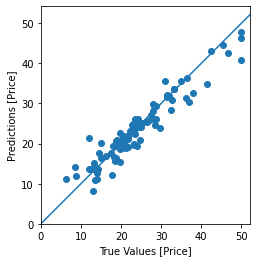

In [11]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
